For my project I will be analysis mid cap stock companies and performing various analysis on opening prices, closing prices, volume, and other factors. My main goal is to use an LSTM model to predict future stock prices. I will be using the Yahoo Finance API to get the stock data.
Objective statement:

In [26]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# stock data reading
from pandas_datareader import DataReader
import yfinance as yf
from pandas_datareader import data as pdr
yf.pdr_override()

#time stamps
from datetime import datetime
end = '2024-04-01'
ten_year = '2014-01-01'
start = '2022-04-01'

#Scaling data for LSTM
from sklearn.preprocessing import MinMaxScaler

I will be analyzinng four mid cap companies: Palo Alto Networks, Adobe, Fortinet, and Amphenol. I also plan on camparing these companies to the SPDR S&P MidCap 400 ETF Trust.

In [27]:
# Tech companies df prep
tech_list = ['PANW', 'ADBE', 'FTNT', 'APH', 'SPMD']
for stock in tech_list:
    globals()[stock] = yf.download(stock, start, end)

company_list = [PANW, ADBE, FTNT, APH]
company_name = ['PALO ALTO NETWORKS', 'ADOBE', 'FORTINET', 'AMPHENOL']

for company, com_name in zip(company_list, company_name):
    company['Company_name'] = com_name

# dataframe for spmd
SPMD['Company_name'] = 'SPDR S&P MIDCAP 400 ETF TRUST'

df = pd.concat(company_list, axis=0)
df

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,Company_name
Date,,,,,,,
2022-04-01,207.100006,210.043335,201.846664,203.703339,203.703339,4029000,PALO ALTO NETWORKS
2022-04-04,205.386673,209.919998,204.500000,209.366669,209.366669,3486600,PALO ALTO NETWORKS
2022-04-05,209.333328,210.413330,203.619995,207.046661,207.046661,3689400,PALO ALTO NETWORKS
2022-04-06,202.509995,204.550003,200.373337,202.266663,202.266663,4227900,PALO ALTO NETWORKS
2022-04-07,201.266663,206.956665,201.266663,205.490005,205.490005,3255300,PALO ALTO NETWORKS
...,...,...,...,...,...,...,...
2024-03-22,114.500000,115.180000,113.860001,114.419998,114.419998,2489300,AMPHENOL
2024-03-25,118.000000,119.589996,114.080002,114.220001,114.220001,4273500,AMPHENOL
2024-03-26,114.650002,115.260002,113.269997,113.339996,113.339996,3424600,AMPHENOL


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2000 entries, 2022-04-01 to 2024-03-28
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          2000 non-null   float64
 1   High          2000 non-null   float64
 2   Low           2000 non-null   float64
 3   Close         2000 non-null   float64
 4   Adj Close     2000 non-null   float64
 5   Volume        2000 non-null   int64  
 6   Company_name  2000 non-null   object 
dtypes: float64(5), int64(1), object(1)
memory usage: 125.0+ KB


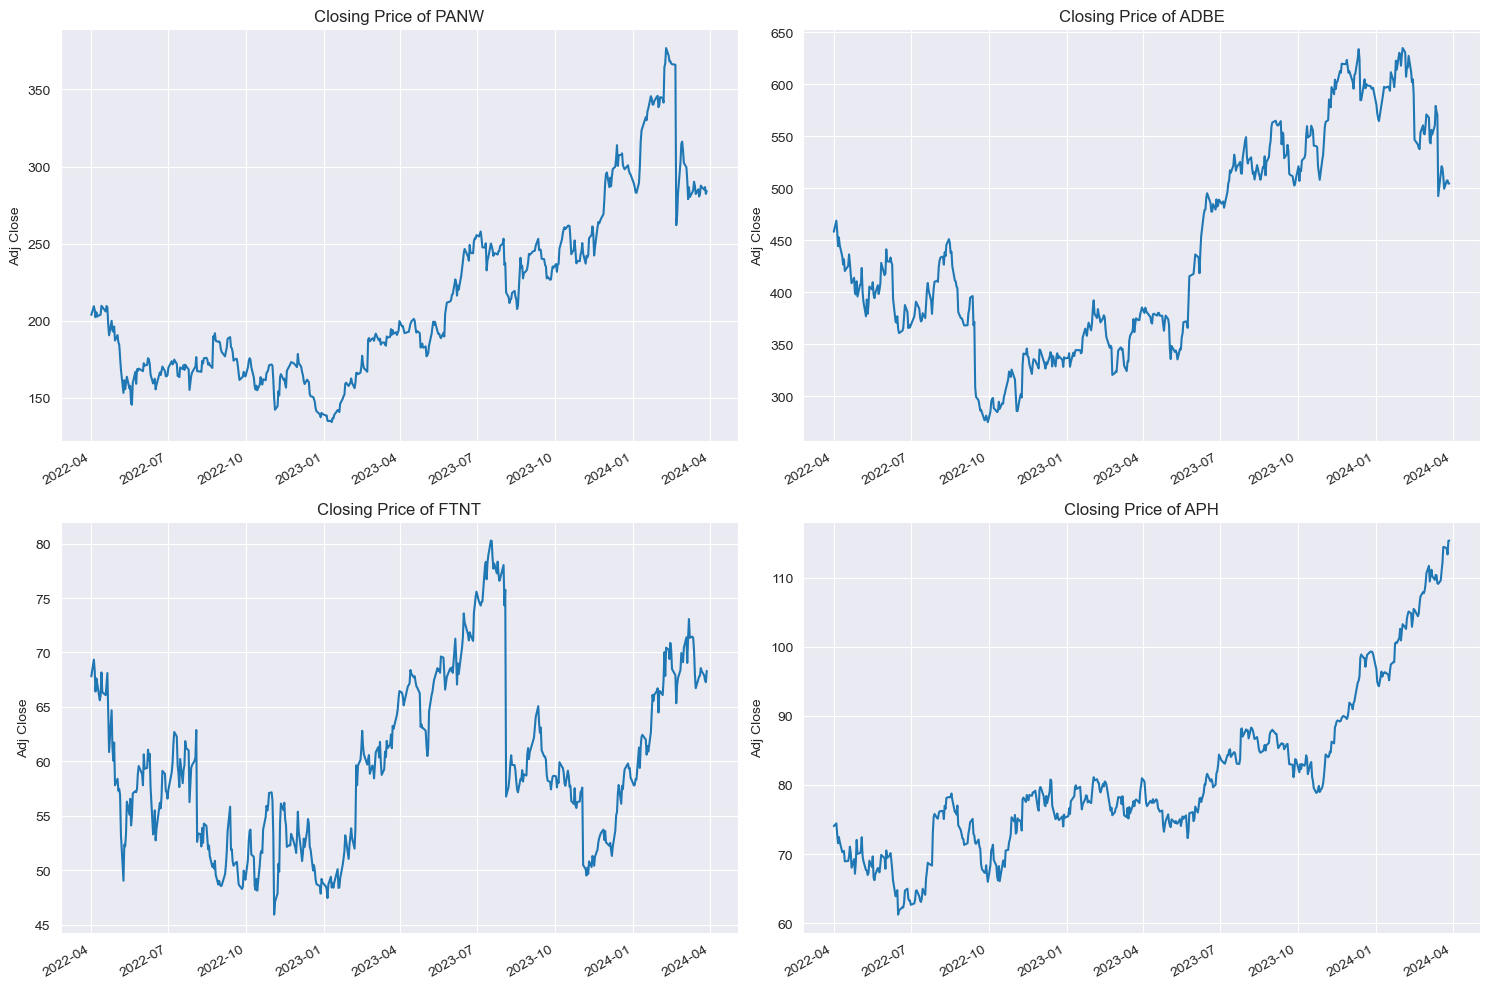

In [29]:
# Clsoing price history from APR 2022-2024
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {tech_list[i - 1]}")
    
plt.tight_layout()

Text(0.5, 1.0, 'Closing Price of SPDR S&P MIDCAP 400 ETF TRUST')

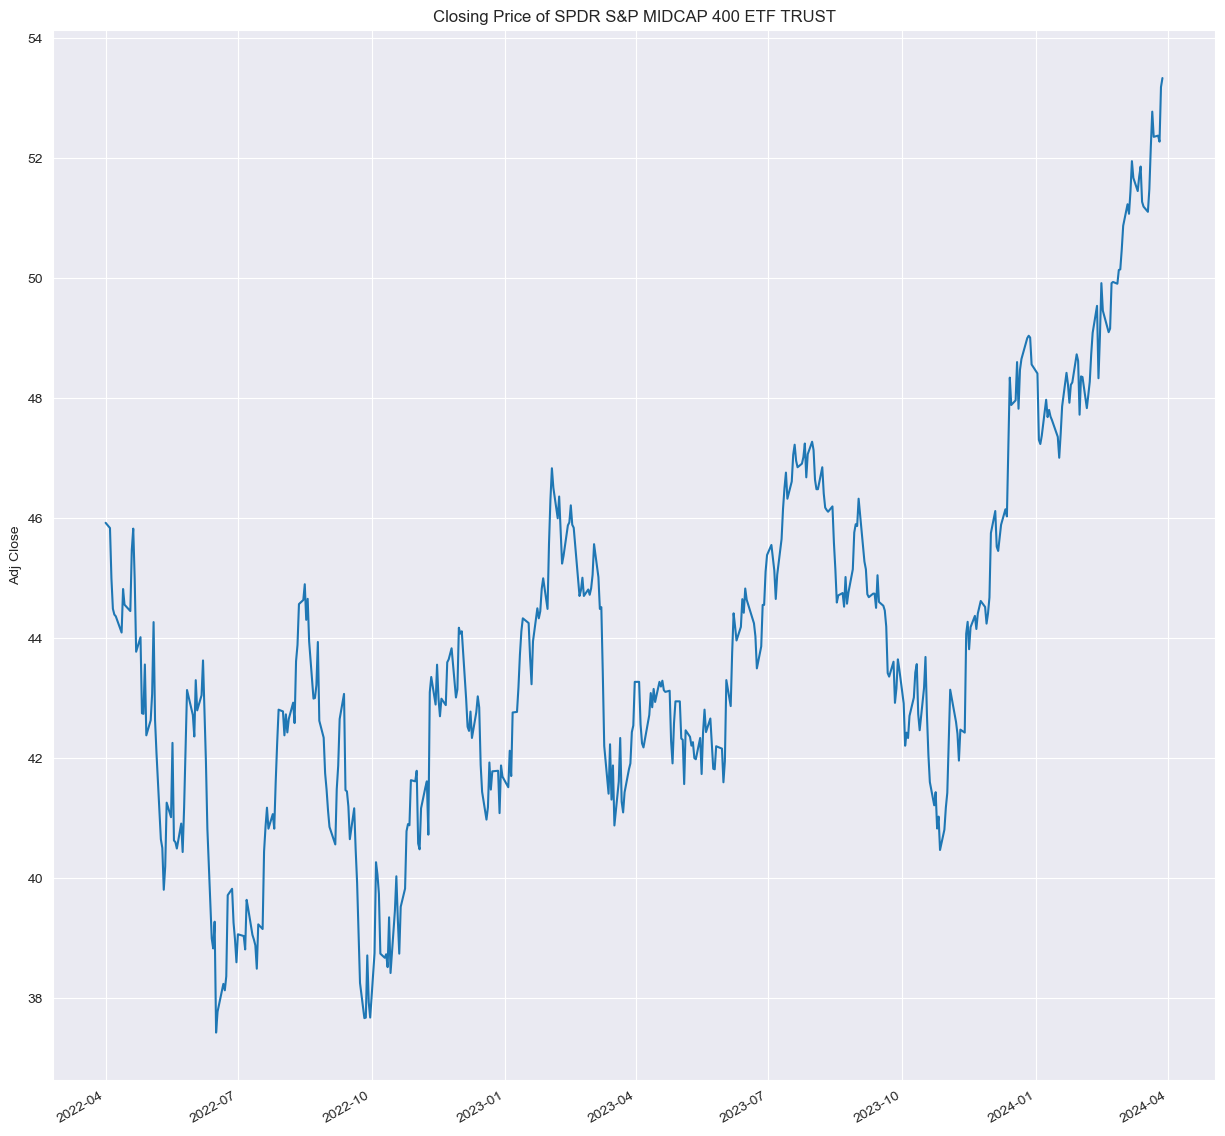

In [30]:
# plot closing price of SPMD ETF Like above
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

SPMD['Adj Close'].plot()
plt.ylabel('Adj Close')
plt.xlabel(None)
plt.title(f"Closing Price of SPDR S&P MIDCAP 400 ETF TRUST")

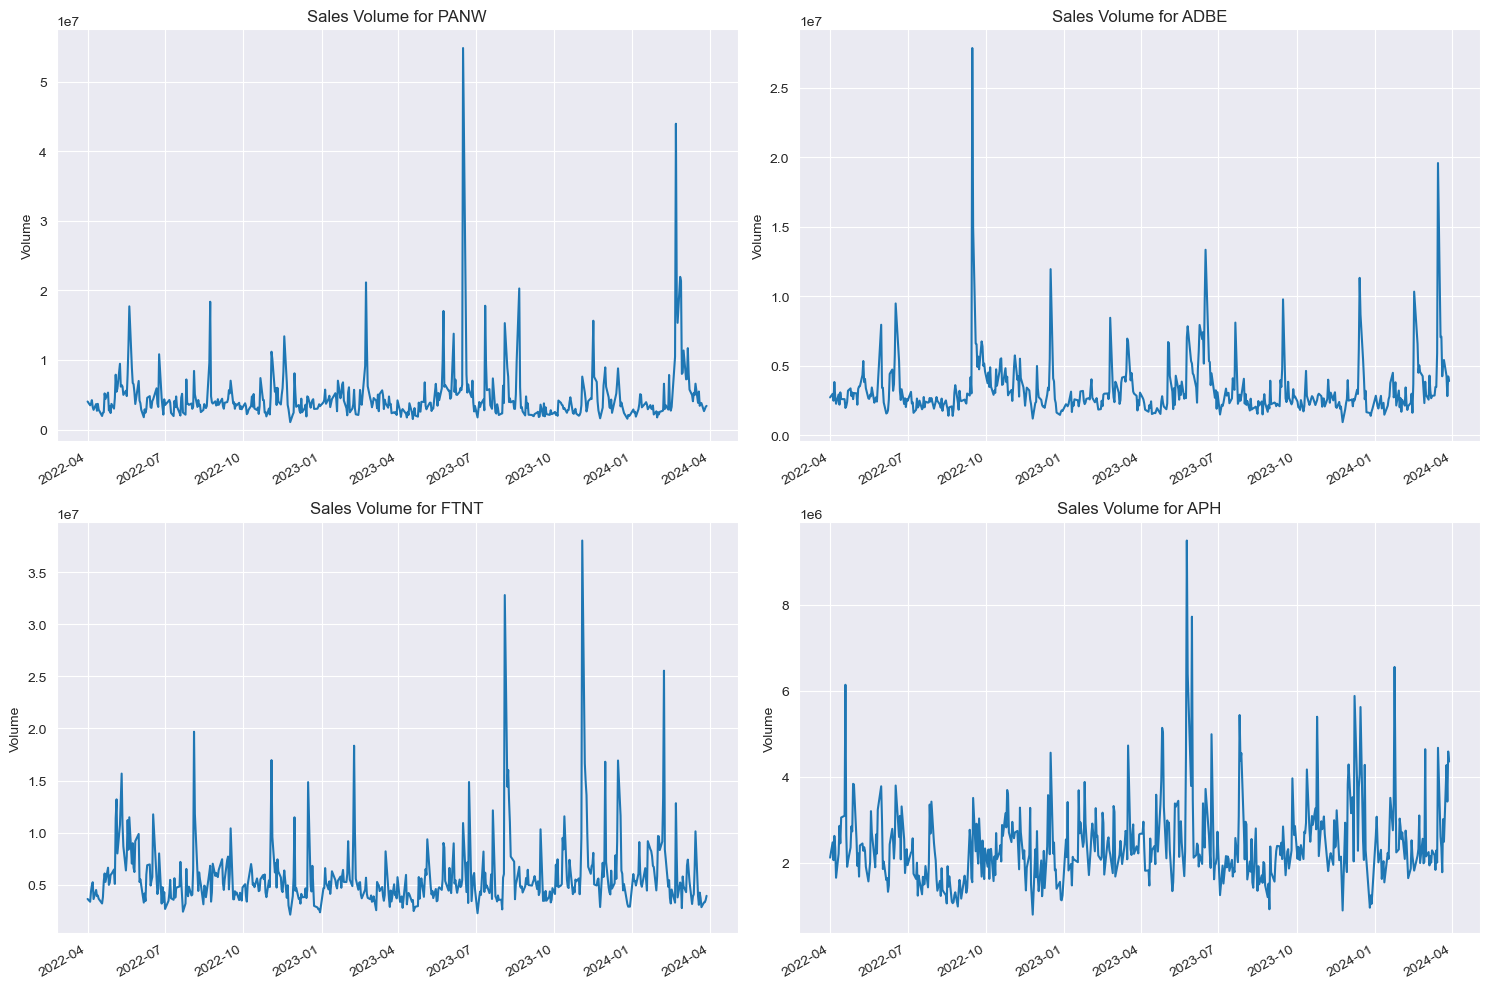

In [31]:
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {tech_list[i - 1]}")
    
plt.tight_layout()

Text(0.5, 1.0, 'Sales Volume for SPDR S&P MIDCAP 400 ETF TRUST')

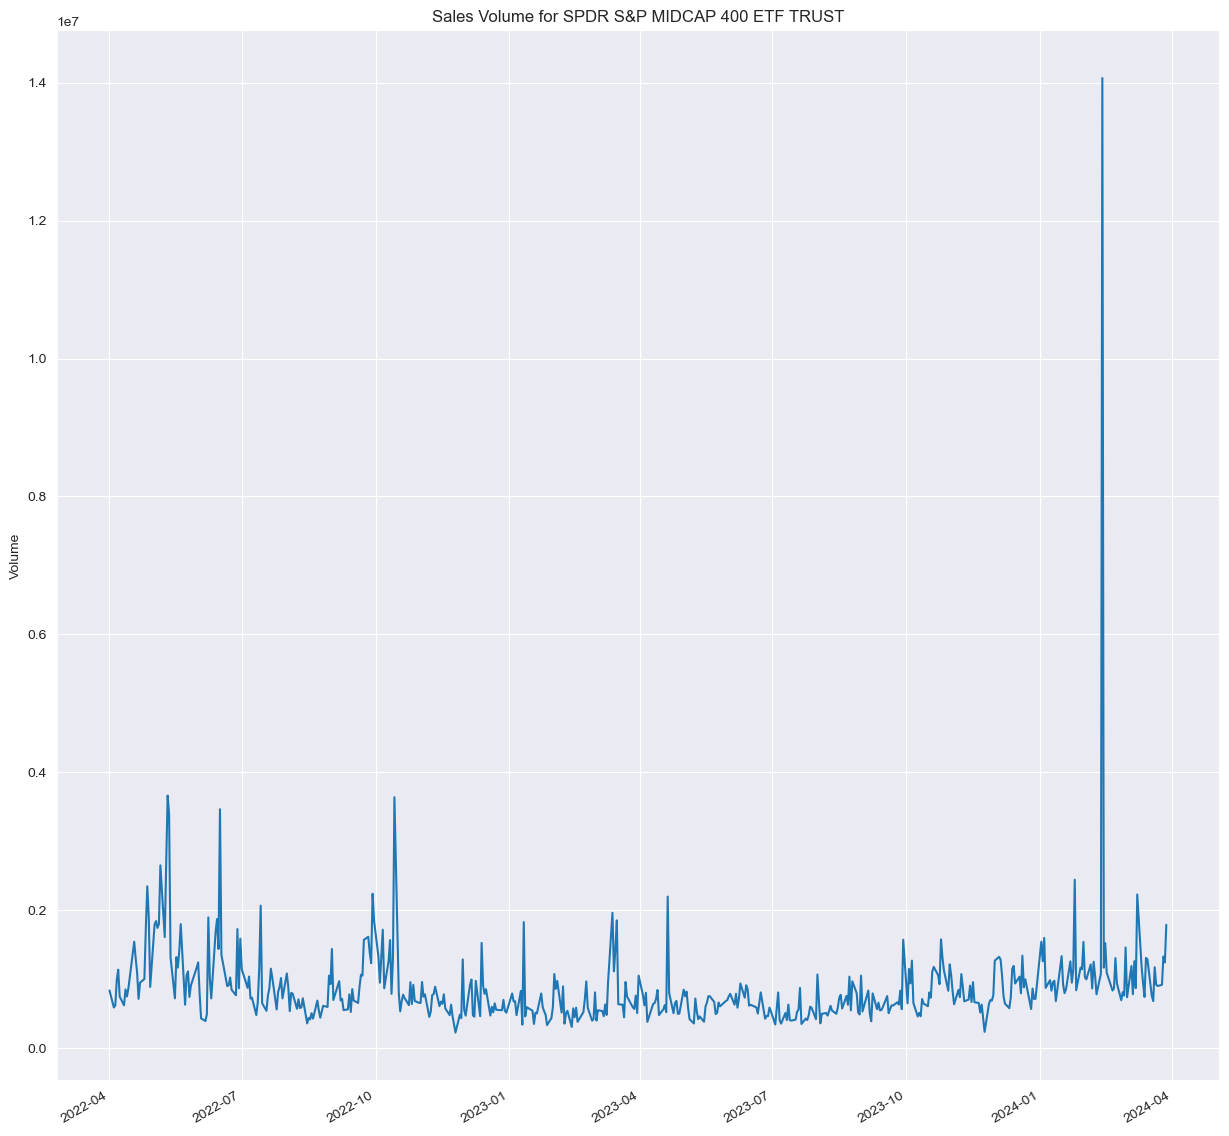

In [32]:
# plot volume of SPMD ETF Like above
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

SPMD['Volume'].plot()
plt.ylabel('Volume')
plt.xlabel(None)
plt.title(f"Sales Volume for SPDR S&P MIDCAP 400 ETF TRUST")

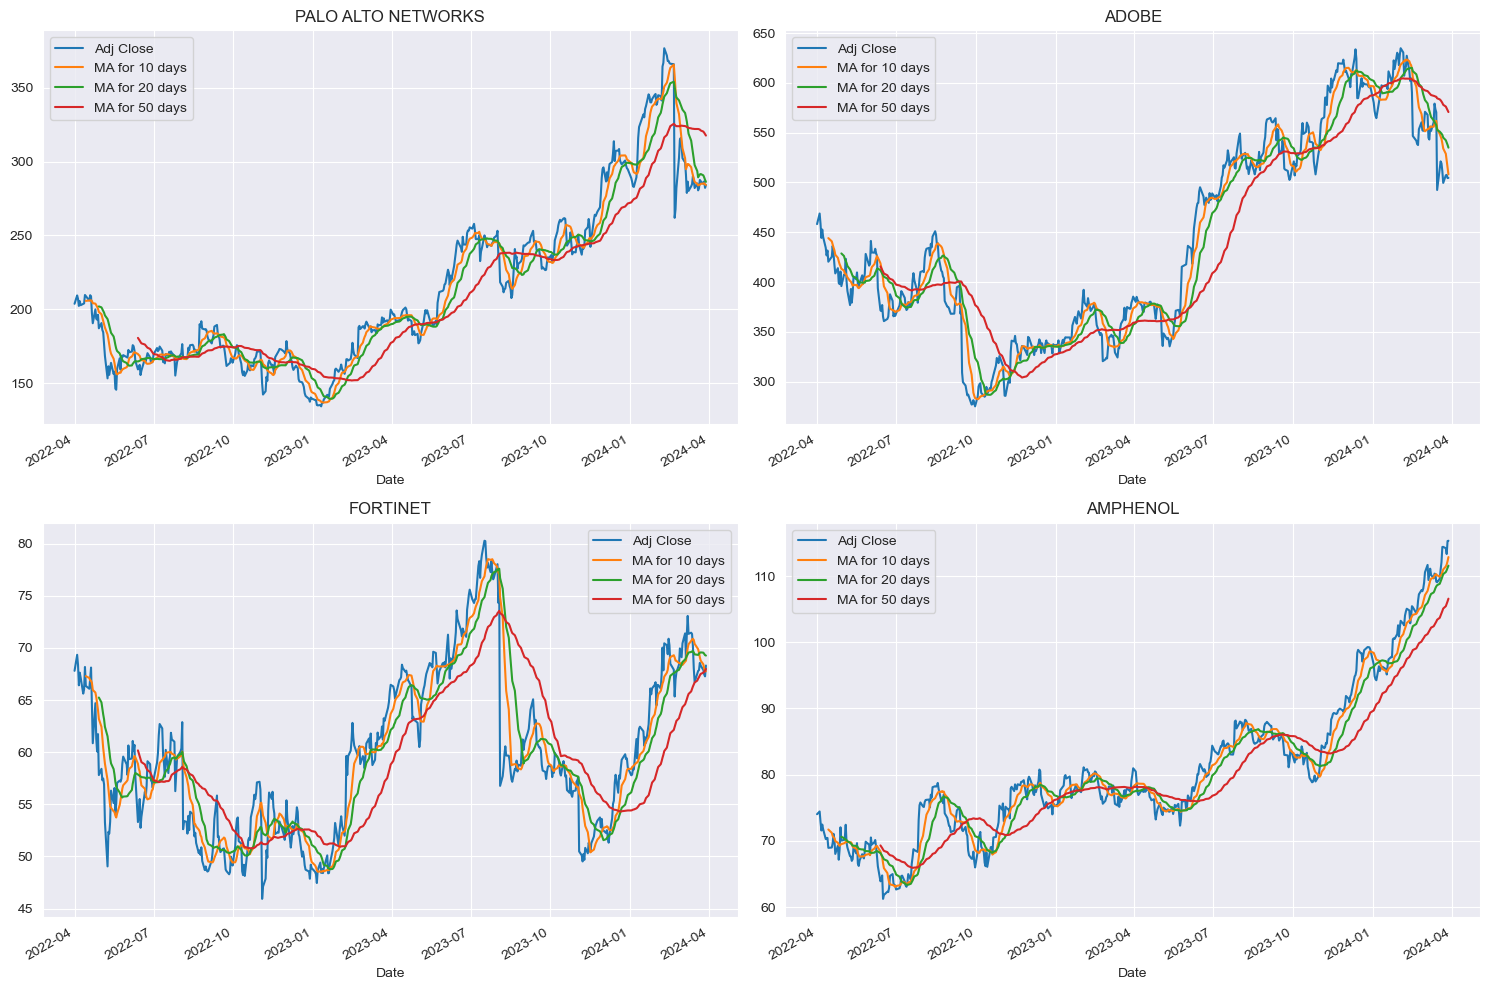

In [33]:
# time series analysis
ma_day = [10, 20, 50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()
        

fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

PANW[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('PALO ALTO NETWORKS')

ADBE[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('ADOBE')

FTNT[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('FORTINET')

APH[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('AMPHENOL')

fig.tight_layout()

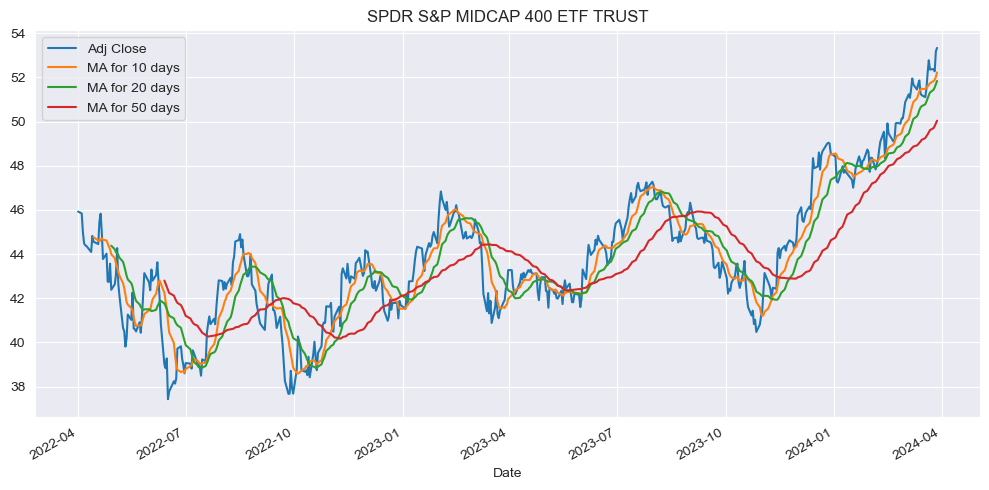

In [34]:
# time series analysis for SPMD ETF
ma_day = [10, 20, 50]

for ma in ma_day:
    column_name = f"MA for {ma} days"
    SPMD[column_name] = SPMD['Adj Close'].rolling(ma).mean()
    
fig, axes = plt.subplots(nrows=1, ncols=1)
fig.set_figheight(5)
fig.set_figwidth(10)

SPMD[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes)
axes.set_title('SPDR S&P MIDCAP 400 ETF TRUST')

fig.tight_layout()

In [35]:
# Grab all the closing prices for the tech stock list into one DataFrame

closing_df = pdr.get_data_yahoo(tech_list, start=start, end=end)['Adj Close']

# Make a new tech returns DataFrame
tech_rets = closing_df.pct_change()
tech_rets.head()

[*********************100%%**********************]  5 of 5 completed


Ticker,ADBE,APH,FTNT,PANW,SPMD
Date,,,,,
2022-04-01,NaN,NaN,NaN,NaN,NaN
2022-04-04,0.023178,0.005558,0.022654,0.027802,-0.001897
2022-04-05,-0.021821,-0.021055,-0.013845,-0.011081,-0.018370
2022-04-06,-0.031074,-0.017879,-0.028723,-0.023087,-0.011185
2022-04-07,0.018882,0.012456,0.018219,0.015936,-0.002175


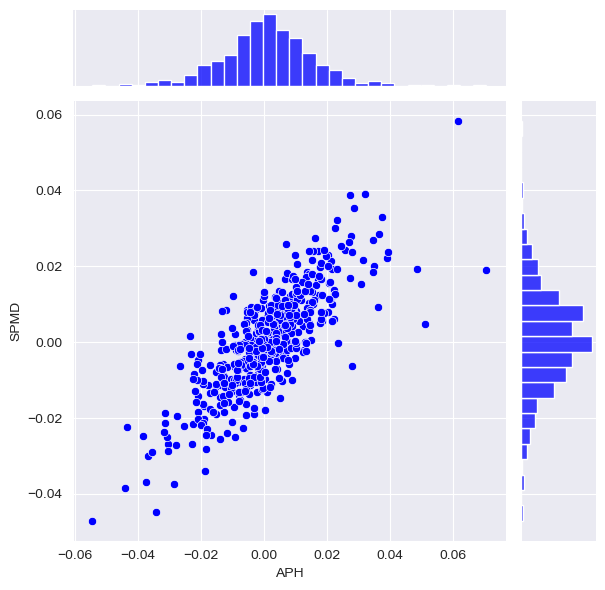

In [36]:
# Comparing daily returns of the tech stocks to SPMD
sns.jointplot(x='APH', y='SPMD', data=tech_rets, kind='scatter', color='blue')

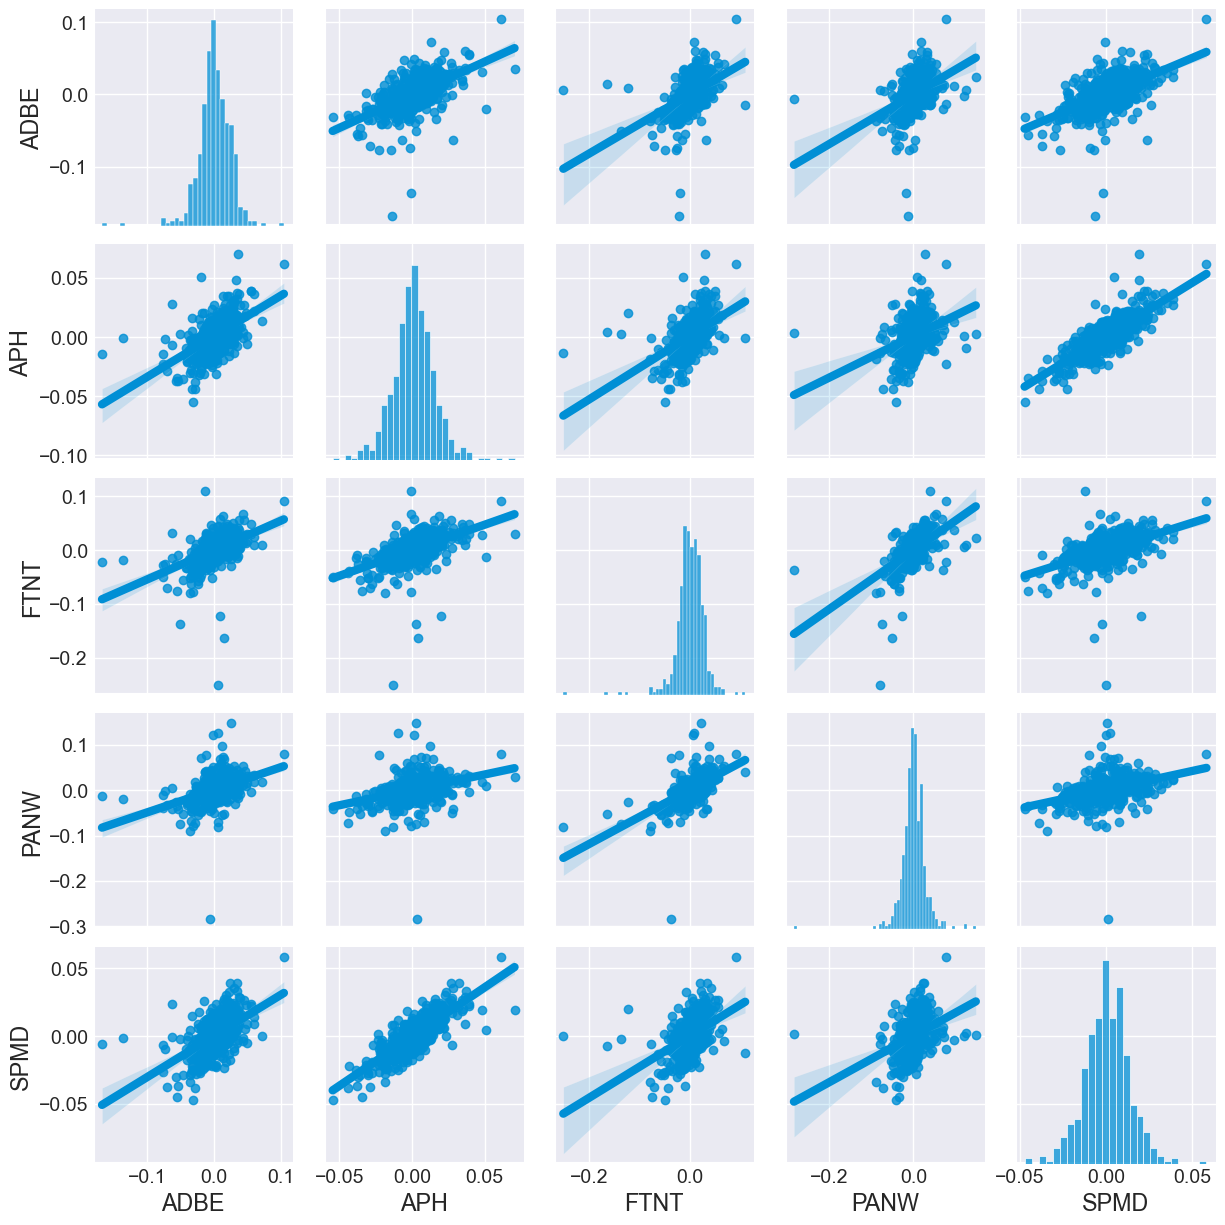

In [48]:
sns.pairplot(tech_rets, kind='reg')

Looking at the data APH and SPMD have a strong correlation. I will be using the LSTM model to predict the future stock prices of APH and SPMD. Review LSTM test notebook.